1. Importing Neccessary Libraries

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.Load the Data

In [244]:
df=pd.read_csv('online_retail.csv')

3.EDA Data about data

In [246]:
df.shape

(541909, 8)

In [247]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [248]:
df.duplicated().sum()

5268

In [249]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [250]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [251]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [253]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [254]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Data Preprocessing - 
Remove rows with missing CustomerID

In [256]:
df=df.dropna(subset=['CustomerID'])      

Exclude cancelled invoices (InvoiceNo starting with 'C')


In [258]:
df=df[~df['InvoiceNo'].astype(str).str.startswith('C')]      

Remove negative or zero quantities and prices


In [260]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [261]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]

EDA Visualization

In [263]:
df['Country'].value_counts()

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


Analyze transaction volume by country

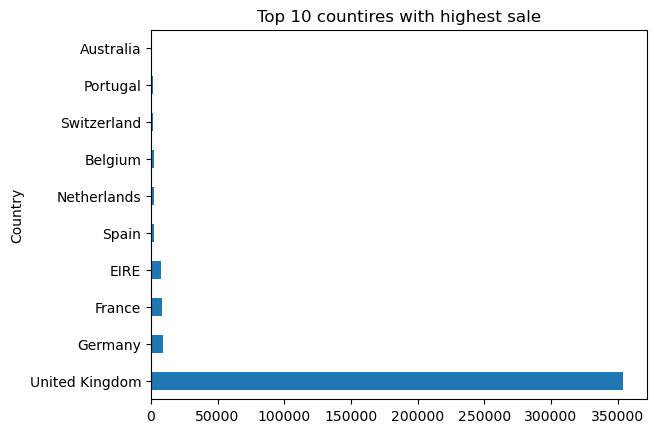

In [265]:
country_orders=df['Country'].value_counts().head(10)
country_orders.plot(kind='barh')
plt.title('Top 10 countires with highest sale')
plt.show()

In [266]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


Identify top-selling products



In [268]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
                                      ... 
RUBY GLASS CLUSTER EARRINGS              1
PINK CHRYSANTHEMUMS ART FLOWER           1
72 CAKE CASES VINTAGE CHRISTMAS          1
WALL ART , THE MAGIC FOREST              1
PAPER CRAFT , LITTLE BIRDIE              1
Name: count, Length: 3877, dtype: int64

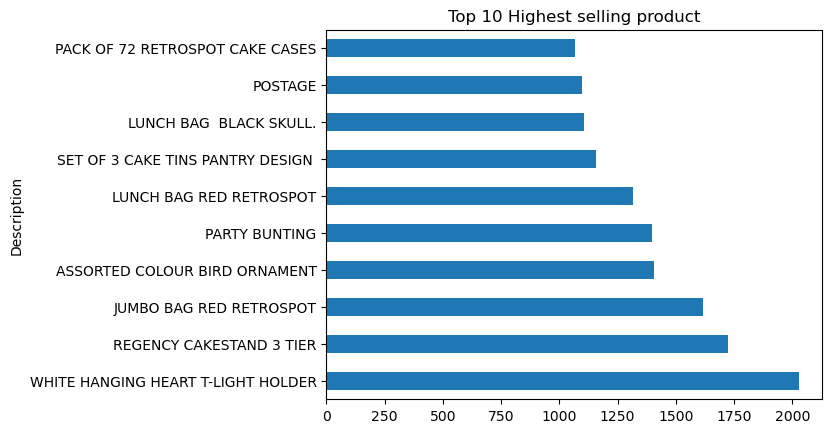

In [269]:
top_sell_prod=df['Description'].value_counts().head(10)
top_sell_prod.plot(kind='barh')
plt.title('Top 10 Highest selling product')
plt.show()

Visualize purchase trends over time


C:\Users\Admin\AppData\Local\Temp\ipykernel_13856\2743505857.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique().plot()


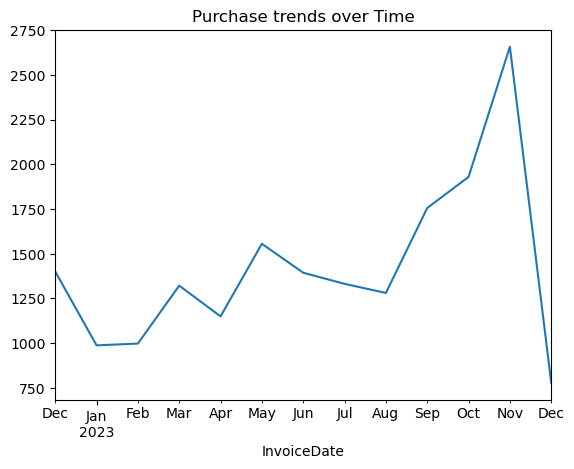

In [271]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique().plot()
plt.title('Purchase trends over Time')
plt.show()
                                 

Inspect monetary distribution per transaction and customer

In [273]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


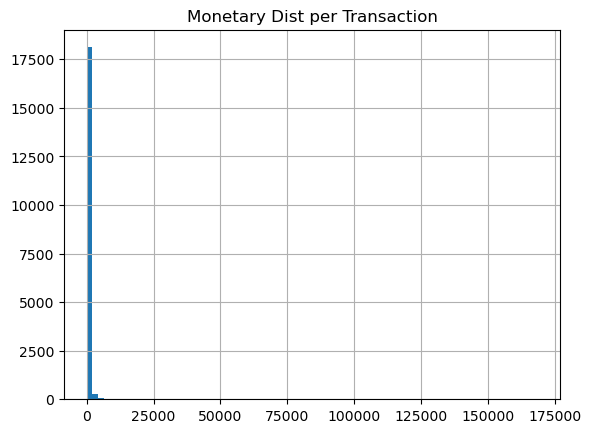

In [274]:
df['Total_price']=df['UnitPrice']*df['Quantity']
df.groupby('InvoiceNo')['Total_price'].sum().hist(bins=80)
plt.title('Monetary Dist per Transaction')
plt.show()

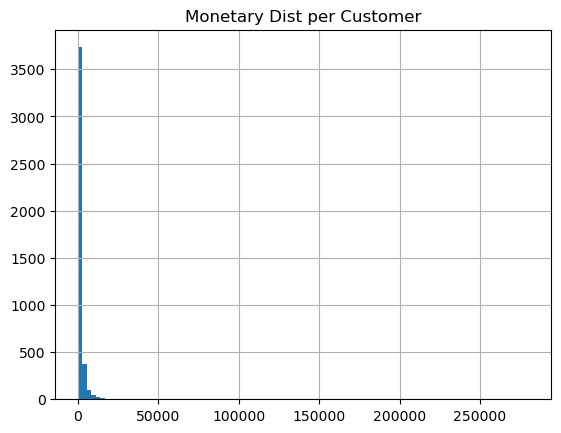

In [275]:
df.groupby('CustomerID')['Total_price'].sum().hist(bins=100)
plt.title('Monetary Dist per Customer')
plt.show()

Calcaluting the RFM distributions


In [277]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [278]:
snapshot_date=df['InvoiceDate'].max()+pd.Timedelta(days=1)
rfm=df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x : (snapshot_date - x.max()).days,
    'InvoiceNo':'nunique',
    'Total_price':'sum'
})

rfm.columns=['Recency','Frequency','Monetary']

In [279]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Normalize The RFM values

In [281]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
rfm_scaled=std_scaler.fit_transform(rfm)

Clustering

In [283]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Elbow curve for finding the K value

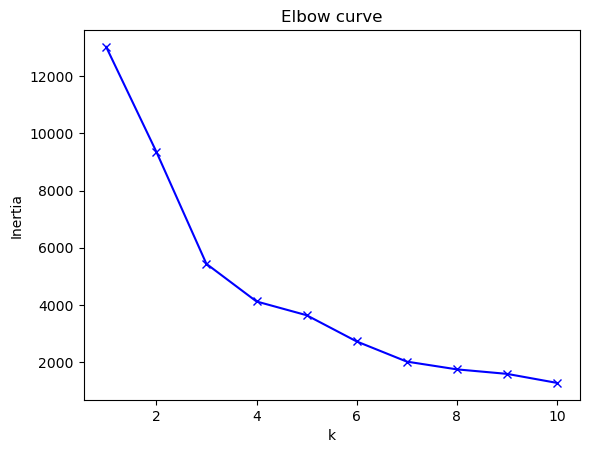

In [285]:
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

Silhoutte Score for Finding K value 

In [287]:
silhoutte_scores=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, random_state=1)
    cluster_labels=kmeans.fit_predict(rfm_scaled)
    score=silhouette_score(rfm_scaled, cluster_labels)
    silhoutte_scores.append(score)
    print(f'Silhoutte score for k ={k}:{score:.4f}')

Silhoutte score for k =2:0.5604
Silhoutte score for k =3:0.5942
Silhoutte score for k =4:0.6126
Silhoutte score for k =5:0.4751
Silhoutte score for k =6:0.5162
Silhoutte score for k =7:0.5177
Silhoutte score for k =8:0.4964
Silhoutte score for k =9:0.4767
Silhoutte score for k =10:0.4790


Applying Kmeans Model


In [289]:
kmeans=KMeans(n_clusters=4, random_state=1)
rfm['Cluster']=kmeans.fit_predict(rfm_scaled)

Finding the mean of clusters

In [291]:
print(rfm.groupby('Cluster').mean())

            Recency  Frequency       Monetary
Cluster                                      
0         42.412472   4.136752    1563.782438
1        247.312268   1.552974     556.665949
2         13.406250  34.739583   21702.508229
3          6.714286  65.428571  184143.690000


VIsualization

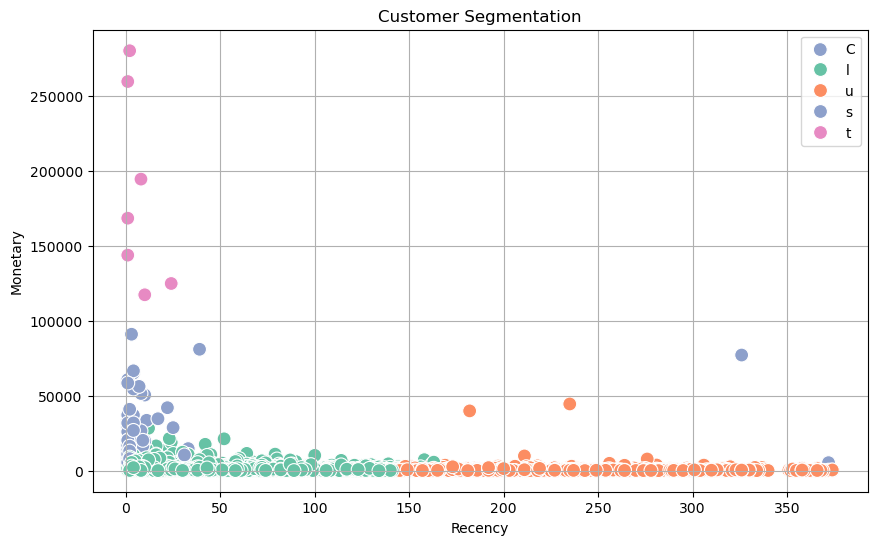

In [293]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend('Clusters')
plt.grid(True)
plt.show()

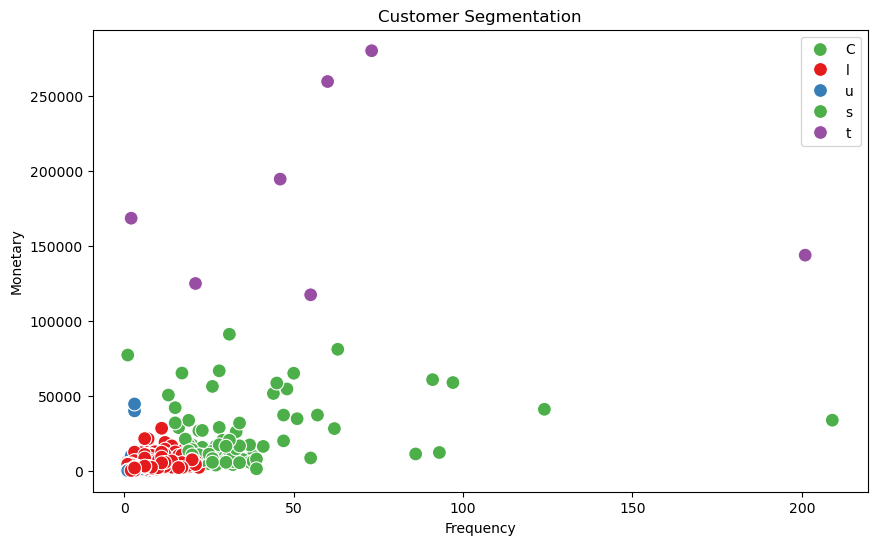

In [294]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend('Clusters')
plt.show()

Finding the Mean of clusters

In [296]:
rfm_clus_avg=rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
print(rfm_clus_avg)

         Recency  Frequency  Monetary
Cluster                              
0           42.4        4.1    1563.8
1          247.3        1.6     556.7
2           13.4       34.7   21702.5
3            6.7       65.4  184143.7


Labeling the Clusters 

In [298]:
cluster_labels={ 
    0: 'Occasional',
    1: 'At-Risk',
    2: 'Regular',
    3: 'High-Value'
}

rfm['Segment']=rfm['Cluster'].map(cluster_labels)

print(rfm[['Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment']]).head()


            Recency  Frequency  Monetary  Cluster     Segment
CustomerID                                                   
12346.0         326          1  77183.60        2     Regular
12347.0           2          7   4310.00        0  Occasional
12348.0          75          4   1797.24        0  Occasional
12349.0          19          1   1757.55        0  Occasional
12350.0         310          1    334.40        1     At-Risk
...             ...        ...       ...      ...         ...
18280.0         278          1    180.60        1     At-Risk
18281.0         181          1     80.82        1     At-Risk
18282.0           8          2    178.05        0  Occasional
18283.0           4         16   2094.88        0  Occasional
18287.0          43          3   1837.28        0  Occasional

[4338 rows x 5 columns]


AttributeError: 'NoneType' object has no attribute 'head'

In [299]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Visualization Based on Customer Segmentation

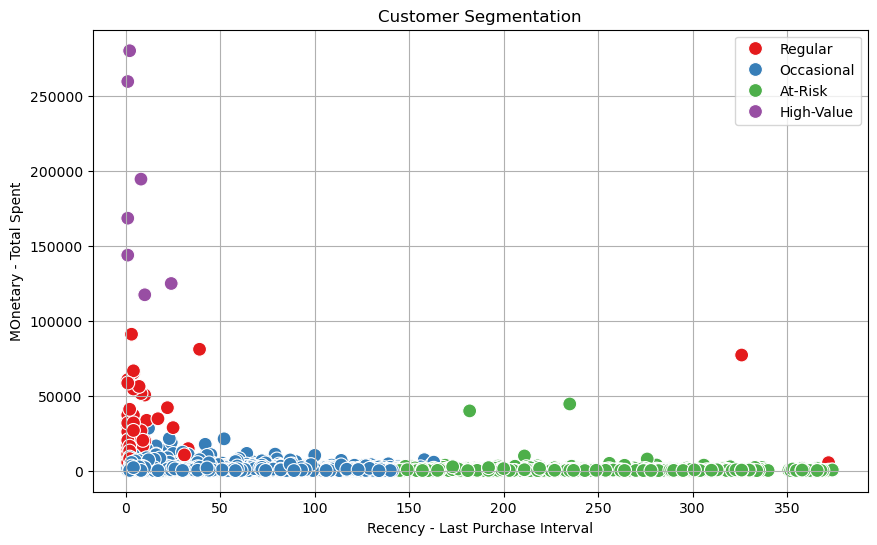

In [302]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set1', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Recency - Last Purchase Interval')
plt.ylabel('MOnetary - Total Spent')
plt.grid(True)
plt.legend()
plt.show()

Save Clustering Model

In [334]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [305]:
joblib.dump(std_scaler, 'scaler.pkl')

['scaler.pkl']

Creating Pivot table for Recommendation system

In [336]:
pivot_table=df.pivot_table(index='CustomerID', columns='Description', values='Quantity', fill_value=0)

Import necc lib

In [339]:
from sklearn.metrics.pairwise import cosine_similarity
product_similarity=cosine_similarity(pivot_table.T)

In [340]:
product_similarity_df=pd.DataFrame(product_similarity, index=pivot_table.columns, columns=pivot_table.columns)

Recommendation Function 

In [342]:
def recommend_products(product_id, similiarity_df, top_n=5):
    similar_scores=similarity_df[product_id].sort_values(ascending=False)[1:top_n+1]
    return similar_scores.index.tolist()

In [345]:
joblib.dump(product_similarity_df, 'product_similarity.pkl')

['product_similarity.pkl']